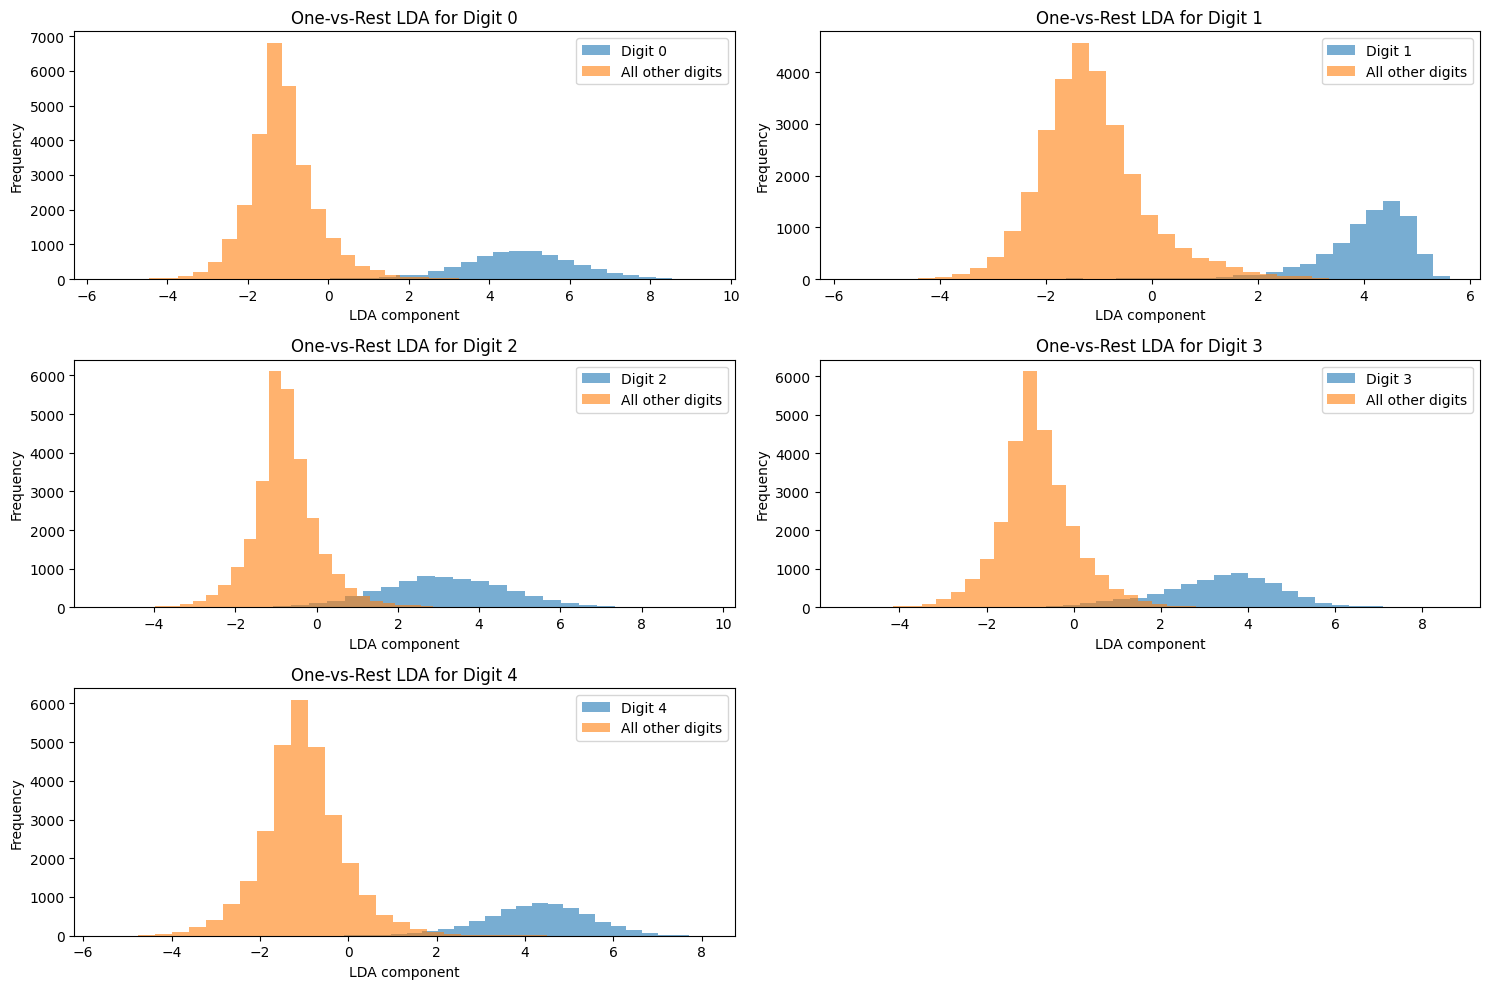

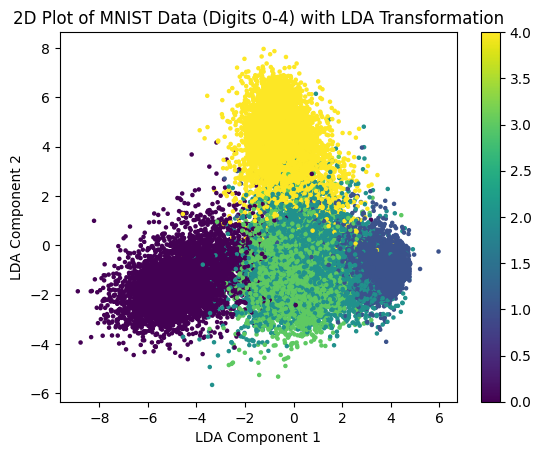

k-NN Accuracy Before LDA: 0.9803
Shape of transformed training data: (28588, 4)
Shape of transformed test data: (7147, 4)
k-NN Accuracy After LDA: 0.9580
k-NN Accuracy Before LDA: 0.9803


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Restrict to digits 0-4 for manageable computation
mask = np.isin(y, [0, 1, 2, 3, 4])
X, y = X[mask], y[mask]

# Normalize pixel values and flatten images
X = StandardScaler().fit_transform(X)

# One-vs-Rest LDA and Histogram Plotting
plt.figure(figsize=(15, 10))

for digit in range(5):
    # Create binary labels: +1 for 'digit' and 0 for all others
    y_binary = np.where(y == digit, 1, 0)

    # Apply LDA for one-vs-rest classification
    lda = LDA(n_components=1)
    X_lda = lda.fit_transform(X, y_binary)

    # Plot histogram for the LDA-transformed data
    plt.subplot(3, 2, digit + 1)
    plt.hist(X_lda[y_binary == 1], bins=30, alpha=0.6, label=f"Digit {digit}")
    plt.hist(X_lda[y_binary == 0], bins=30, alpha=0.6, label="All other digits")
    plt.legend()
    plt.title(f"One-vs-Rest LDA for Digit {digit}")
    plt.xlabel("LDA component")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# 2D Plot (pairwise LDA components) if LDA with n_components=2
lda_2d = LDA(n_components=2)
X_lda_2d = lda_2d.fit_transform(X, y)

plt.figure()
plt.scatter(X_lda_2d[:, 0], X_lda_2d[:, 1], c=y, cmap='viridis', s=5)
plt.colorbar()
plt.title("2D Plot of MNIST Data (Digits 0-4) with LDA Transformation")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.show()

# 1. Initial k-NN Classification (Before LDA)
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply k-NN on the original high-dimensional data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate accuracy before LDA
accuracy_before_lda = accuracy_score(y_test, y_pred)
print(f'k-NN Accuracy Before LDA: {accuracy_before_lda:.4f}')

# 2. Applying LDA for Dimensionality Reduction (components = number of classes - 1)
lda = LDA(n_components=4)

# Fit LDA on the training data and transform both the training and test sets
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Check the shape of the transformed data
print(f"Shape of transformed training data: {X_train_lda.shape}")
print(f"Shape of transformed test data: {X_test_lda.shape}")

# 3. k-NN Classification After LDA
# Apply k-NN on the LDA-transformed data
knn.fit(X_train_lda, y_train)
y_pred_lda = knn.predict(X_test_lda)

# Calculate accuracy after applying LDA
accuracy_after_lda = accuracy_score(y_test, y_pred_lda)
print(f'k-NN Accuracy After LDA: {accuracy_after_lda:.4f}')

# Compare accuracy before and after LDA
print(f'k-NN Accuracy Before LDA: {accuracy_before_lda:.4f}')
